# Mushroom Classifier

This project has been taken from https://www.kaggle.com/uciml/mushroom-classification?select=mushrooms.csv. 

The goal is implemanting a random forest classifier to the data with the better accuracy possible. The target will be the edibility of the mushrooms based on all the others parameters.

## Imports

In [164]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, RandomizedSearchCV

In [58]:
df = pd.read_csv('mushrooms.csv')

## Exploring the dataset

In [59]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [60]:
df.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [61]:
df.shape

(8124, 23)

In [62]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

Not null items

## Data Wrangling and visualization

In [63]:
for column in df.columns:
    df[column]=LabelEncoder().fit_transform(df[column])
    
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


The string codes for all variables has been switched to numeric categories

In [64]:
Predictors = df.iloc[:,1:]
Targets = df.iloc[:,0]
Predictors.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [65]:
Predictors_std = StandardScaler().fit_transform(Predictors)
Predictors_std

array([[ 1.02971224,  0.14012794, -0.19824983, ..., -0.67019486,
        -0.5143892 ,  2.03002809],
       [ 1.02971224,  0.14012794,  1.76587407, ..., -0.2504706 ,
        -1.31310821, -0.29572966],
       [-2.08704716,  0.14012794,  1.37304929, ..., -0.2504706 ,
        -1.31310821,  0.86714922],
       ...,
       [-0.8403434 ,  0.14012794, -0.19824983, ..., -1.50964337,
        -2.11182722,  0.28570978],
       [-0.21699152,  0.95327039, -0.19824983, ...,  1.42842641,
         0.28432981,  0.28570978],
       [ 1.02971224,  0.14012794, -0.19824983, ...,  0.16925365,
        -2.11182722,  0.28570978]])

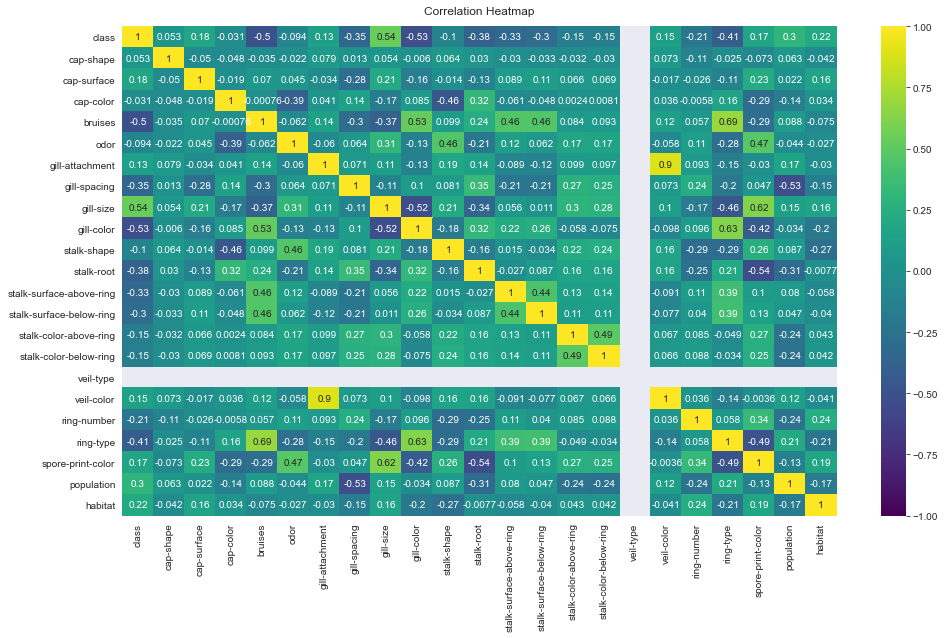

In [101]:
sns.set_style(style='dark')
plt.figure(figsize=(16,9))
heatmap = sns.heatmap(df.corr(), vmin=-1,vmax=1, annot=True,cmap='viridis')

heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)
plt.show()

Let's see if taking a PCA on the components could reduce the amount of components taken for the regression in a significant way.

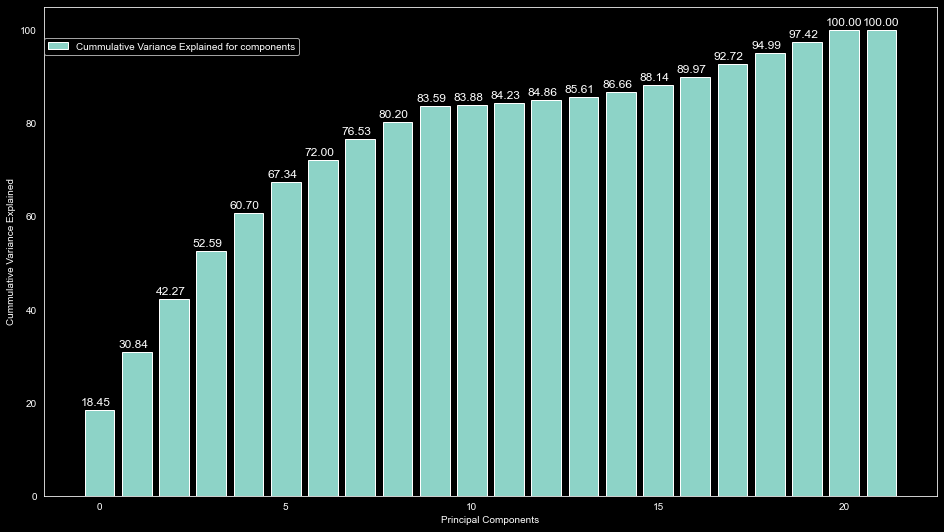

In [67]:
cov_mat = np.cov(Predictors_std.T)

eig_vals, eig_vectors = np.linalg.eig(cov_mat)

total_sum = sum(eig_vals)
var_exp = [(i/total_sum)*100 for i in eig_vals]
cum_var_exp = np.cumsum(var_exp)

with plt.style.context('dark_background'):
    plt.figure(figsize=(16,9))
    plt.bar(range(22),cum_var_exp, label='Cummulative Variance Explained for components')
    plt.xlabel('Principal Components')
    plt.ylabel('Cummulative Variance Explained')
    plt.legend(loc=(0,0.9))
    for i in range(22):
        plt.text(x = i-0.5 , y = cum_var_exp[i]+1, s = '{:.2f}'.format(cum_var_exp[i]), size = 12)



Is worthyless to take a PCA on the components since for explaining almost 90% of the data variance we must take at least 17 of the 22 prediction variables which is not a significant amount.

## Random Forest Classifier 

### Dividing the data in train and test

In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(Predictors,Targets, test_size = 0.25)

### Letting the algorithm get the parameters

In [91]:
forest_clas1 = RandomForestClassifier(oob_score=True, random_state=42) #Random State for reproducibiliy, oob_score for statistic

In [92]:
forest_clas1.fit(X_train,Y_train)

RandomForestClassifier(oob_score=True, random_state=42)

In [149]:
print(forest_clas1.oob_score_,forest_clas1.n_estimators,forest_clas1.min_samples_leaf,forest_clas1.min_samples_split)

1.0 100 1 2


In [94]:
Y_pred = forest_clas1.predict(X_test)

In [99]:
forest_clas1.score(X_test,Y_pred)

1.0

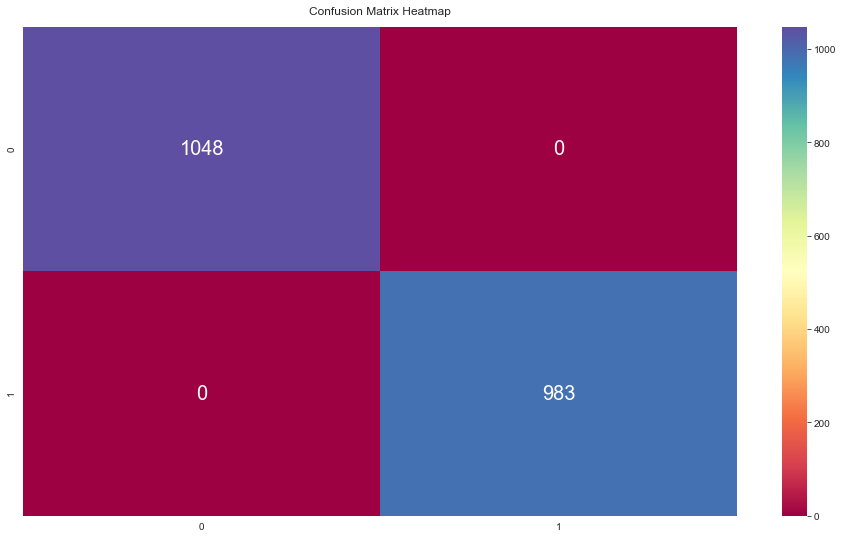

In [112]:
conf_mat = metrics.confusion_matrix(Y_test,Y_pred)

sns.set_style(style='dark')
plt.figure(figsize=(16,9))
heatmap = sns.heatmap(conf_mat, vmin=np.min(conf_mat.all()),vmax=np.max(conf_mat), annot=True,fmt='d', annot_kws={"fontsize":20},cmap='Spectral')

heatmap.set_title('Confusion Matrix Heatmap', fontdict={'fontsize':12}, pad=12)

plt.show()


In [121]:
Y_prob= forest_clas1.predict_proba(X_test)[:,1]
espc_1, sensit, _=metrics.roc_curve(Y_test,Y_prob)
auc_roc=metrics.auc(espc_1,sensit)

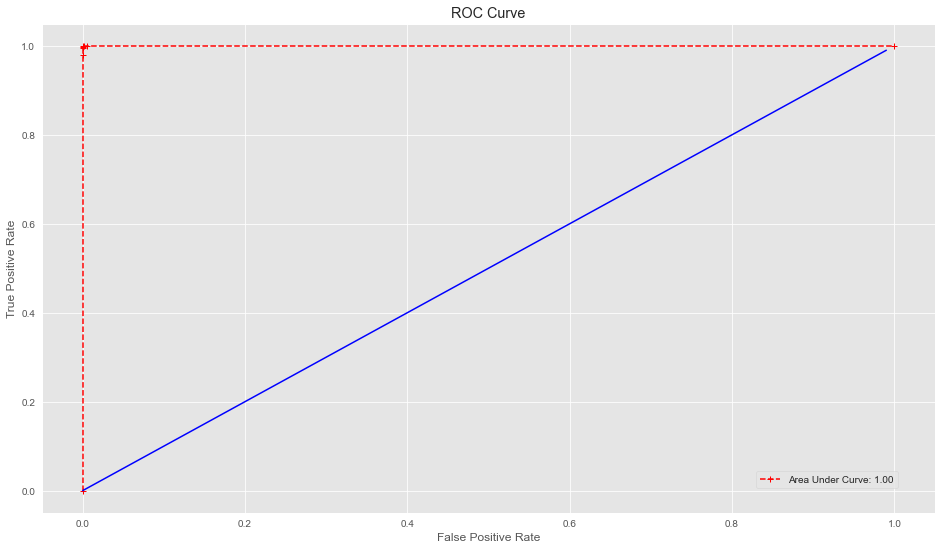

In [135]:
with plt.style.context('ggplot'):
    plt.figure(figsize=(16,9))
    plt.plot(espc_1,sensit, marker="+", linestyle="--", color='red', label='Area Under Curve: %0.2f'%auc_roc)
    x=[i*0.01 for i in range(100)]
    y=[i*0.01 for i in range(100)]
    plt.plot(x,y, color='blue')
    plt.legend(loc=(0.8,0.05))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
plt.show()

### Exploring Best Parameters with RandomizedSearchCV

In [167]:
parameters = {'min_samples_leaf': range(1,110, 10),'n_estimators':range(0,1050,50), 'min_samples_split': range(1,11,2) }

model_RandFor=RandomForestClassifier()
forest_clas2 = RandomizedSearchCV(model_RandFor,parameters,cv=10, scoring='accuracy', n_jobs=2)

In [168]:
forest_clas2.fit(X_train,Y_train)

RandomizedSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=2,
                   param_distributions={'min_samples_leaf': range(1, 110, 10),
                                        'min_samples_split': range(1, 11, 2),
                                        'n_estimators': range(0, 1050, 50)},
                   scoring='accuracy')

In [169]:
forest_clas2.best_params_

{'n_estimators': 100, 'min_samples_split': 9, 'min_samples_leaf': 21}

In [170]:
forest_clas2.best_score_

0.9967167353091604

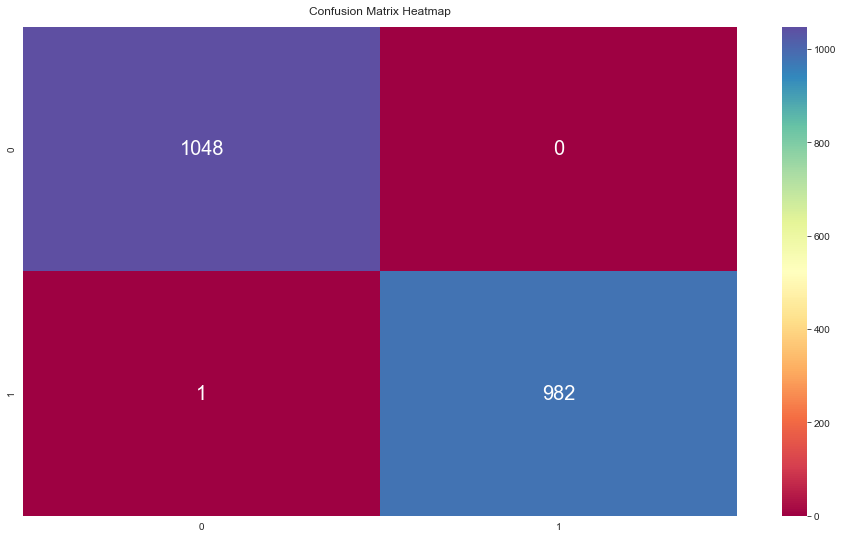

In [171]:
Y_pred = forest_clas2.predict(X_test)
conf_mat = metrics.confusion_matrix(Y_test,Y_pred)

sns.set_style(style='dark')
plt.figure(figsize=(16,9))
heatmap = sns.heatmap(conf_mat, vmin=np.min(conf_mat.all()),vmax=np.max(conf_mat), annot=True,fmt='d', annot_kws={"fontsize":20},cmap='Spectral')

heatmap.set_title('Confusion Matrix Heatmap', fontdict={'fontsize':12}, pad=12)

plt.show()

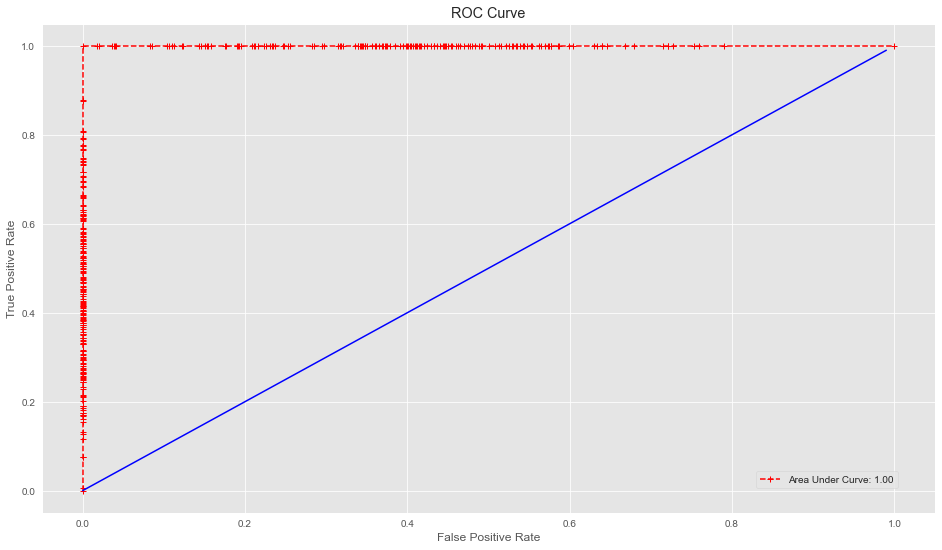

In [172]:
Y_prob= forest_clas2.predict_proba(X_test)[:,1]
espc_1, sensit, _=metrics.roc_curve(Y_test,Y_prob)
auc_roc=metrics.auc(espc_1,sensit)
with plt.style.context('ggplot'):
    plt.figure(figsize=(16,9))
    plt.plot(espc_1,sensit, marker="+", linestyle="--", color='red', label='Area Under Curve: %0.2f'%auc_roc)
    x=[i*0.01 for i in range(100)]
    y=[i*0.01 for i in range(100)]
    plt.plot(x,y, color='blue')
    plt.legend(loc=(0.8,0.05))
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    
plt.show()

## Conclusion

We have reached an accuracy of 100% with the self constructing Random Forest Classifier and an accuracy of 99.67% with de Randomized Grid Search CV due to one False Positive value. Both algorithms are pretty robust in mushroom classification.

Other algorithms that could reach the 100% accuracy are 'SVM', 'K-Nearest-Neighbors' or 'Spectral Clustering'.